In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


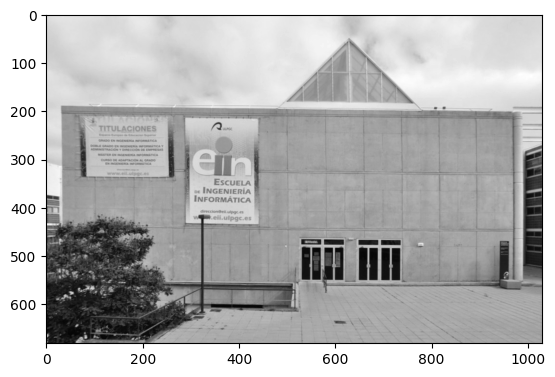

In [12]:

image = plt.imread("./images/eii.png")
plt.imshow(image, cmap="gray")



In [61]:
def convolution(image, kernel):
    """Convolve an image with a kernel.
    
    Args:
        image (np.ndarray): The image to convolve.
        kernel (np.ndarray): The kernel to convolve with.
    
    Returns:
        np.ndarray: The convolved image.
    """
    result_image = np.copy(image)

    def get_3x3_matrix(point):
        """
        get 3x3 matrix of image in around a point
        """
        matrix = np.zeros((3,3))
        for x in range(3):
            for y in range(3):
                matrix[x][y] = image[point[0]-1+x][point[1]-1+y]
        return matrix
        
    for x in range(1, len(image)-1):
        for y in range(1, len(image[0])-1):
            result_image[x][y] = np.sum(get_3x3_matrix([x,y]) * kernel)
            
    return result_image

kernel_suavizado = np.array([[0.0625, 0.0125, 0.0625],[0.0125, 0.25, 0.125],[0.0625, 0.0125, 0.0625]])
kernel = np.array([[-1., -1., -1.],[0., 0., 0.],[1., 1., 1.]])
kernel2 = np.array([[-1., 0., 1.],[-1., 0., 1.],[-1., 0., 1.]])
result_image = None
for i in range(0, 3):
    result_image =  convolution(image, kernel_suavizado)

result_image_x = convolution(image, kernel)
result_image_y = convolution(image, kernel2)
print(result_image[4][4])


0.5253431


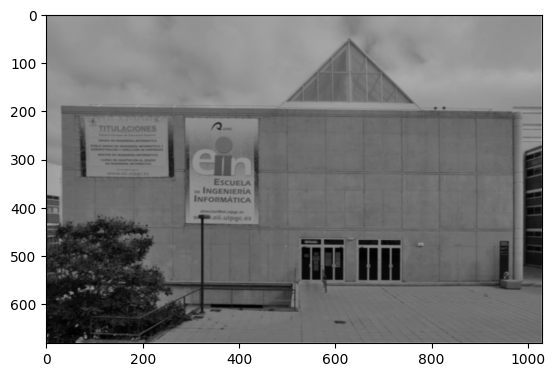

In [62]:

plt.imshow(result_image, cmap="gray")

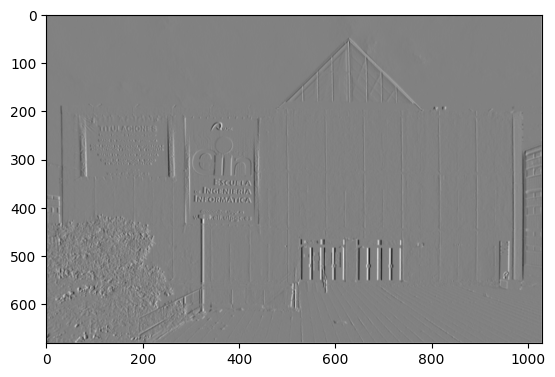

In [63]:

plt.imshow(result_image_y, cmap="gray")

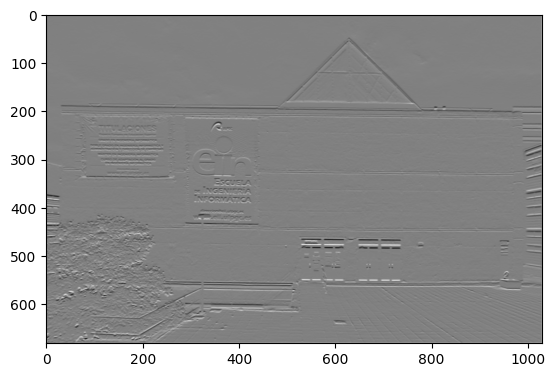

In [64]:

plt.imshow(result_image_x, cmap="gray")

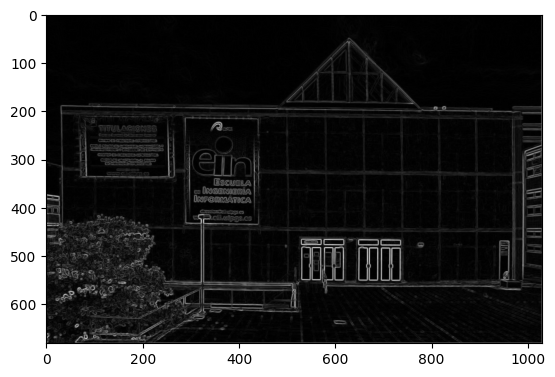

In [69]:
import math

gradient = np.copy(result_image_x)

for x in range(0, len(gradient)):
    for y in range(0, len(gradient[0])):
        gradient[x][y] = math.sqrt((result_image_x[x][y]**2) + (result_image_y[x][y]**2))

plt.imshow(gradient, cmap='gray')


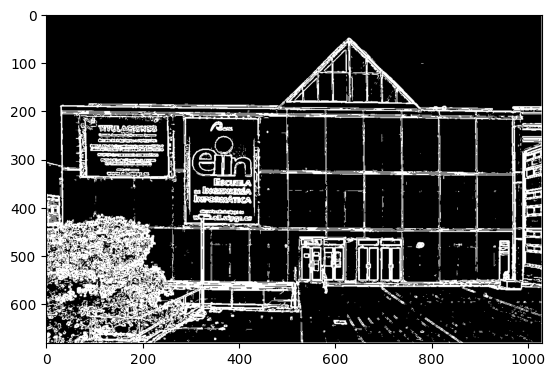

In [73]:
perc = np.copy(gradient)


cnt = np.percentile(gradient, 80)

for x in range(0, len(perc)):
    for y in range(0, len(perc[0])):
        if(perc[x][y] > cnt):
            perc[x][y] = 255
plt.imshow(perc, cmap='gray')